In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


let's see the data whether or not there is missing data

In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
print('missing data total bedroom is', (data['total_bedrooms'].isnull().sum()/len(data)))

missing data total bedroom is 0.01002906976744186


because the missing data from total bedrooms is 1%, so it's okay to dropna the missing value

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

i notice that ocean_proximity does not contain number. let's check if it's categorical or not.

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

there are five category in ocean_proximity. i'm gonna change it into binary value

In [8]:
data = pd.get_dummies(data=data, drop_first=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


i am going to seperate between input and target. after that, i'll split into train and test data.

In [9]:
x = data.drop('median_house_value', axis=1)
y = data.median_house_value

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

i guess that's good enough to go. because the range between values is far, let's scale the value.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

now we are good to go. let's import tensorlfow

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

In [16]:
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
128/128 [==============================] - 5s 23ms/step - loss: 43995348992.0000 - val_loss: 14159290368.0000
Epoch 2/100
128/128 [==============================] - 3s 22ms/step - loss: 11580815360.0000 - val_loss: 10204535808.0000
Epoch 3/100
128/128 [==============================] - 3s 22ms/step - loss: 8965554176.0000 - val_loss: 8105448448.0000
Epoch 4/100
128/128 [==============================] - 3s 22ms/step - loss: 7357637120.0000 - val_loss: 6824999424.0000
Epoch 5/100
128/128 [==============================] - 3s 22ms/step - loss: 6258554368.0000 - val_loss: 5977565184.0000
Epoch 6/100
128/128 [==============================] - 3s 22ms/step - loss: 5595683328.0000 - val_loss: 5534445056.0000
Epoch 7/100
128/128 [==============================] - 3s 22ms/step - loss: 5293911040.0000 - val_loss: 5391814144.0000
Epoch 8/100
128/128 [==============================] - 3s 25ms/step - loss: 5177282560.0000 - val_loss: 5270075904.0000
Epoch 9/100
128/128 [===============

<Axes: >

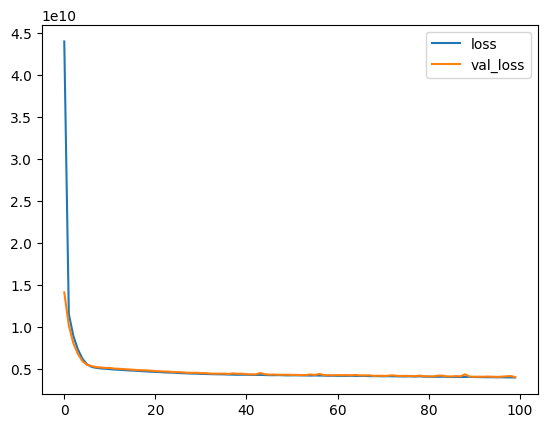

In [19]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [20]:
prediction = model.predict(x_test)

128/128 [==============================] - 1s 4ms/step


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
print('r2 is', round(r2_score(y_true=y_test, y_pred=prediction),3))
print('MAE is', round(mean_absolute_error(y_true=y_test, y_pred=prediction),3))
print('RMSE is', round(mean_squared_error(y_true=y_test, y_pred=prediction,squared=False),3))

r2 is 0.701
MAE is 44789.818
RMSE is 63913.371


from r2, we can see that 70% of the house price can be explained by the input.